In [1]:
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def macd_factor(df, fast=12, slow=26, signal=9):
    ema_fast = df['close'].ewm(span=fast, adjust=False).mean()
    ema_slow = df['close'].ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    return macd_line - macd_line.ewm(span=signal, adjust=False).mean()

In [5]:
evaluator.set_factor(
    factor_data_or_func=macd_factor,
    factor_name='macd_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): -0.004393
   Rank_IC (Spearman): -0.022529
📊 信息比率:
   IR: 0.194413
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 129306
   因子列: macd_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


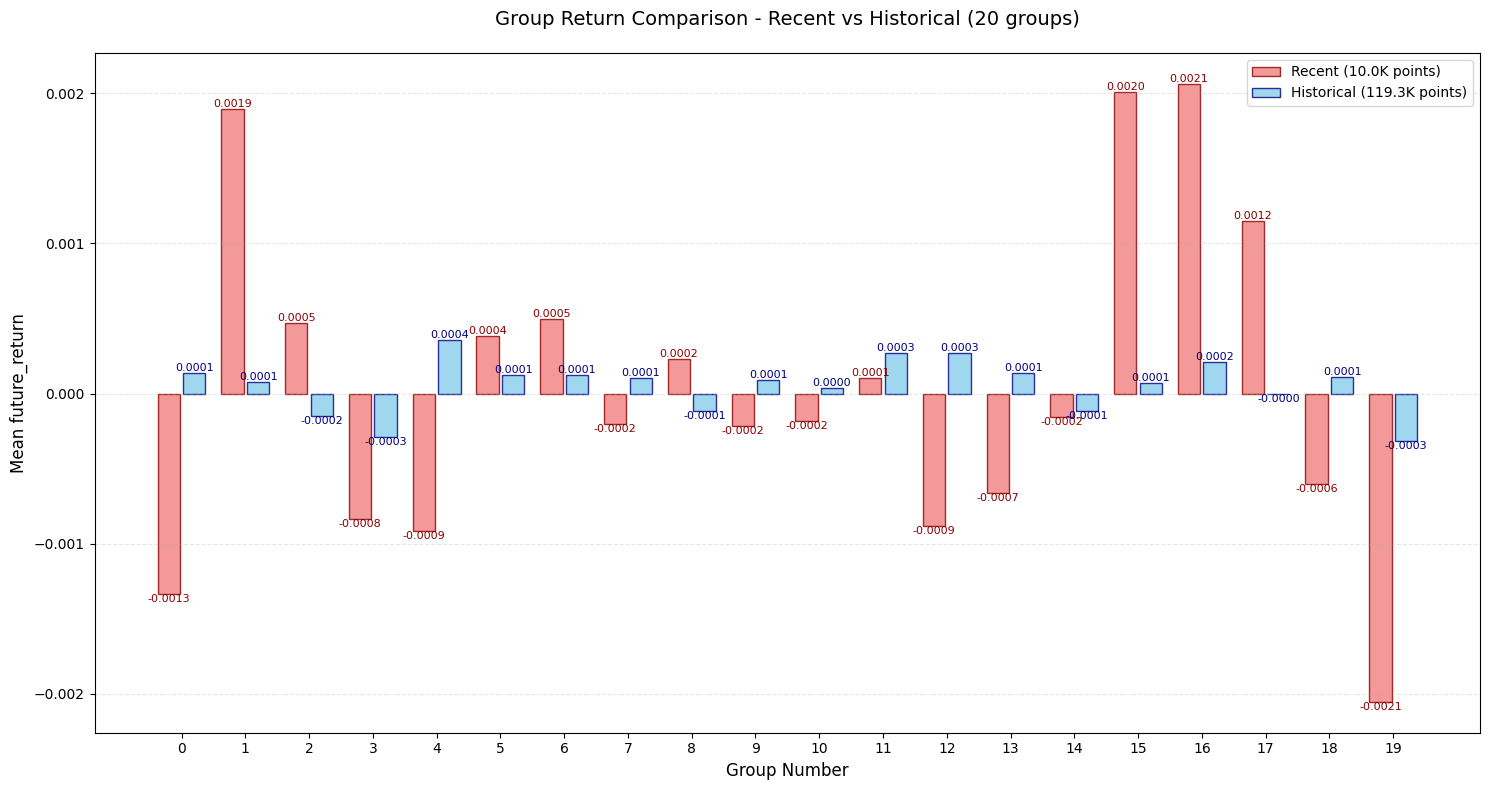

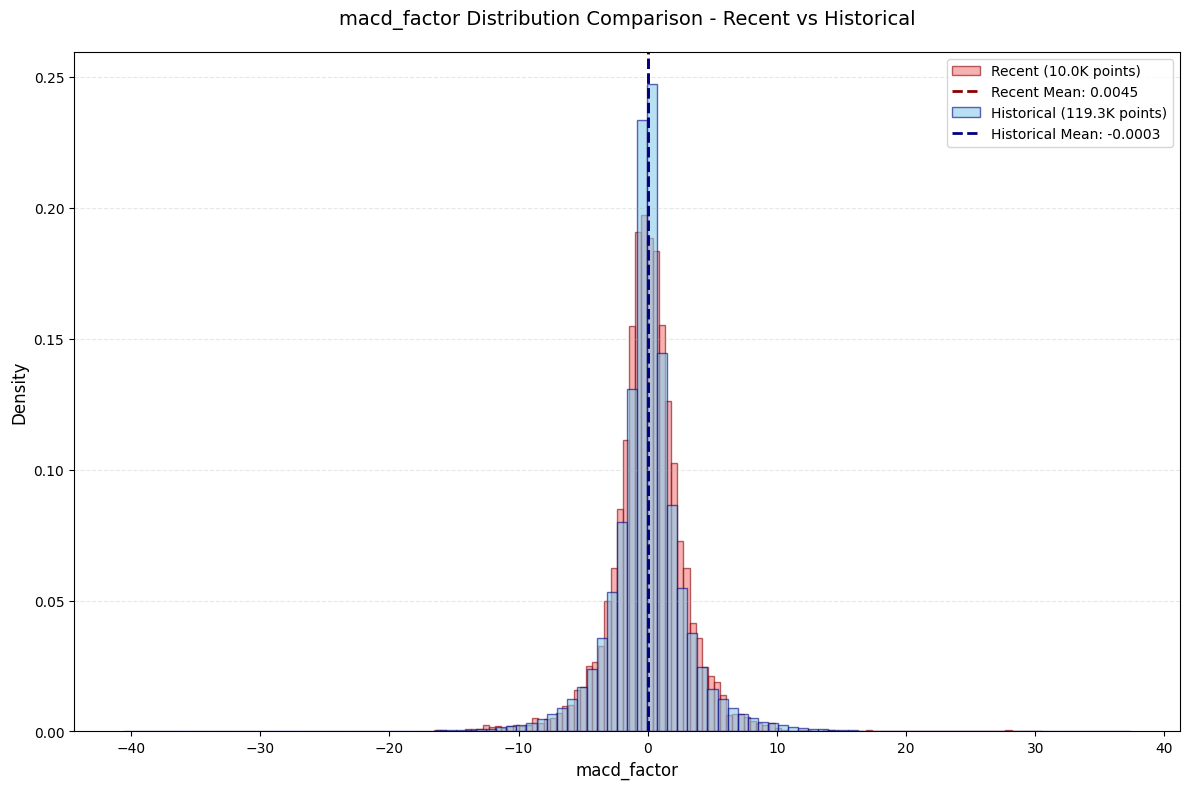

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)